<a href="https://colab.research.google.com/github/prabhasg03/Python_Projects/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bone marrow project**
# Red Marrow:

**Location:** Found mainly in the flat bones, such as the skull, ribs, vertebrae, and sternum, as well as the ends of long bones.
**Function**: Responsible for the production of red blood cells (erythrocytes), white blood cells (leukocytes), and platelets (thrombocytes) through a process called hematopoiesis.
# Yellow Marrow:

**Location:** Found in the central cavities of long bones, such as the femur and humerus.
**Function:** Primarily composed of fat cells and serves as a storage site for adipose tissue. It can convert back to red marrow in certain situations when the body requires increased blood cell production.

# **A list of some common bone marrow disorders:**

1.    Leukemia
1.    Lymphoma
1.    Multiple Myeloma
1.    Myelodysplastic Syndromes (MDS)
1.    Aplastic Anemia
1.    Polycythemia Vera
1.    Essential Thrombocythemia
1.    Myelofibrosis
1.    Hemophagocytic Lymphohistiocytosis (HLH)
1.    Paroxysmal Nocturnal Hemoglobinuria (PNH)
1.    Thalassemia
1.    Sickle Cell Anemia




**1.    Leukemia:** Cancer of the blood and bone marrow, leading to abnormal production of white blood cells.

**2.    Lymphoma:** Cancer that begins in the lymphatic system, affecting the lymph nodes and sometimes involving the bone marrow.

**3.    Multiple Myeloma:** Cancer that forms in plasma cells, a type of white blood cell, leading to overproduction and accumulation of abnormal plasma cells in the bone marrow.

**4.    Myelodysplastic Syndromes (MDS):** Group of disorders characterized by abnormal development of blood cells in the bone marrow.

**5.    Aplastic Anemia:** Condition where the bone marrow fails to produce enough blood cells, including red blood cells, white blood cells, and platelets.

**6.    Polycythemia Vera:** Blood disorder characterized by overproduction of red blood cells, leading to thickened blood and potential circulation problems.

**7.    Essential Thrombocythemia:** Disorder involving the overproduction of platelets in the bone marrow, potentially leading to blood clotting issues.

**8.    Myelofibrosis:** Condition where the bone marrow is replaced by fibrous tissue, impairing its ability to produce blood cells.

**9.    Hemophagocytic Lymphohistiocytosis (HLH):** Rare immune system disorder that can affect the bone marrow, leading to excessive immune response and inflammation.

**10.    Paroxysmal Nocturnal Hemoglobinuria (PNH):** Rare genetic disorder resulting in the destruction of red blood cells and increased susceptibility to blood clots.

**11.    Thalassemia:** Genetic disorder affecting hemoglobin production, leading to abnormal red blood cells and anemia.

**12.    Sickle Cell Anemia:** Genetic disorder causing red blood cells to take on a rigid, sickle-like shape, leading to various complications including anemia and pain crises.

In [5]:
!pip install opendatasets
!pip install keras.utils
!pip install np_utils
!pip install keras.models
!pip install keras.utils
!pip install keras.layers
!pip install keras.callbacks

ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers
ERROR: Could not find a version that satisfies the requirement keras.callbacks (from versions: none)
ERROR: No matching distribution found for keras.callbacks


In [6]:
!pip install matplotlib
!pip install matplotlib.widgets
!pip install matplotlib.widgets

ERROR: Could not find a version that satisfies the requirement matplotlib.widgets (from versions: none)
ERROR: No matching distribution found for matplotlib.widgets
ERROR: Could not find a version that satisfies the requirement matplotlib.widgets (from versions: none)
ERROR: No matching distribution found for matplotlib.widgets


In [7]:
!pip install np-utils
!pip install opencv-python
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install keras

In [3]:
#Install necessary libraries
!pip install opendatasets
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import keras.utils as np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [4]:
import opendatasets as od
# Specify the Kaggle dataset URLs for bone marrow cell classification and other disorders
bone_marrow_url = "https://www.kaggle.com/datasets/andrewmvd/bone-marrow-cell-classification"
leukemia_url = "https://www.kaggle.com/datasets/andrewmvd/leukemia-classification"
lymphoma_url = "https://www.kaggle.com/datasets/andrewmvd/malignant-lymphoma-classification"
thalassemia_url = "https://www.kaggle.com/datasets/andrewh23/thalassemia-cells"
sickle_cell_anemia_url = "https://www.kaggle.com/datasets/andrewh23/cells-of-sickle"

# Download the datasets
od.download(bone_marrow_url)
od.download(leukemia_url)
od.download(lymphoma_url)
od.download(thalassemia_url)
od.download(sickle_cell_anemia_url)
username='shravankumar6602'
key='7494e29d03eeb68400379a2430d08433'

Skipping, found downloaded files in "./bone-marrow-cell-classification" (use force=True to force download)
Skipping, found downloaded files in "./leukemia-classification" (use force=True to force download)
Skipping, found downloaded files in "./malignant-lymphoma-classification" (use force=True to force download)
Skipping, found downloaded files in "./thalassemia-cells" (use force=True to force download)
Skipping, found downloaded files in "./cells-of-sickle" (use force=True to force download)


In [8]:
directories = {
    'bone_marrow': '/content/bone-marrow-cell-classification/bone_marrow_cell_dataset',
    'leukemia': '/content/leukemia-classification',
    'lymphoma': '/content/malignant-lymphoma-classification',
    'thalassemia': '/content/thalassemia-cells',
    'sickle_cell_anemia': '/content/cells-of-sickle'
}

In [9]:
# Define the image size
image_size = (64, 64)

# Define the list of labels/classes
labels = ['NGB', 'PLM', 'EBO', 'EOS', 'LYT', 'MON']

# Initialize empty lists for images and labels
images = []
class_labels = []

In [10]:
# Function to read and preprocess images
def read_and_preprocess(directory):
    if os.path.exists(directory):
        for label in labels:
            file_directory = os.path.join(directory, label)
            if os.path.exists(file_directory):
                for filename in os.listdir(file_directory):
                    file_path = os.path.join(file_directory, filename)
                    if os.path.isdir(file_path):
                        for img_filename in os.listdir(file_path):
                            if img_filename.endswith(('.jpg', '.bmp', '.tif')):
                                img = cv2.imread(os.path.join(file_path, img_filename))
                                img = cv2.resize(img, image_size)
                                images.append(img)
                                class_labels.append(label)


In [11]:
# Read and preprocess images for each directory
for directory in directories.values():
    read_and_preprocess(directory)

In [12]:
# Convert the images and labels to NumPy arrays
images = np.array(images)
class_labels = np.array(class_labels)

In [13]:
# Perform one-hot encoding of the class labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(class_labels)
labels_one_hot = np_utils.to_categorical(labels_encoded)

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_one_hot, test_size=0.1, random_state=42)

In [15]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))

In [16]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Define the path to save the best model
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [18]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=7, validation_data=(X_test, y_test), callbacks=[model_checkpoint])

Epoch 1/7
2283/2283 [==============================] - ETA: 0s - loss: 1.6416 - accuracy: 0.6005
Epoch 1: val_accuracy improved from -inf to 0.68162, saving model to model.h5
2283/2283 [==============================] - 37s 13ms/step - loss: 1.6416 - accuracy: 0.6005 - val_loss: 0.8831 - val_accuracy: 0.6816
Epoch 2/7
   1/2283 [..............................] - ETA: 26s - loss: 0.6685 - accuracy: 0.7188

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2282/2283 [============================>.] - ETA: 0s - loss: 0.8148 - accuracy: 0.7095
Epoch 2: val_accuracy improved from 0.68162 to 0.69887, saving model to model.h5
2283/2283 [==============================] - 22s 10ms/step - loss: 0.8150 - accuracy: 0.7094 - val_loss: 0.8340 - val_accuracy: 0.6989
Epoch 3/7
2278/2283 [============================>.] - ETA: 0s - loss: 0.7087 - accuracy: 0.7520
Epoch 3: val_accuracy improved from 0.69887 to 0.73866, saving model to model.h5
2283/2283 [==============================] - 21s 9ms/step - loss: 0.7084 - accuracy: 0.7521 - val_loss: 0.7740 - val_accuracy: 0.7387
Epoch 4/7
2278/2283 [============================>.] - ETA: 0s - loss: 0.5491 - accuracy: 0.8134
Epoch 4: val_accuracy improved from 0.73866 to 0.80224, saving model to model.h5
2283/2283 [==============================] - 22s 10ms/step - loss: 0.5492 - accuracy: 0.8134 - val_loss: 0.5892 - val_accuracy: 0.8022
Epoch 5/7
2283/2283 [==============================] - ETA: 0s - loss: 0

In [19]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

254/254 [==============================] - 1s 4ms/step - loss: 0.6132 - accuracy: 0.8296
Test Loss: 0.6132
Test Accuracy: 0.8296


In [20]:
# Load the saved model
model_path = 'model.h5'
loaded_model = load_model(model_path)

In [21]:
# Perform predictions on test images
predictions = loaded_model.predict(X_test)

254/254 [==============================] - 1s 3ms/step


In [22]:
# Convert predictions to class labels
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

In [23]:
# Convert one-hot encoded true labels to class labels
true_labels = label_encoder.inverse_transform(np.argmax(y_test, axis=1))

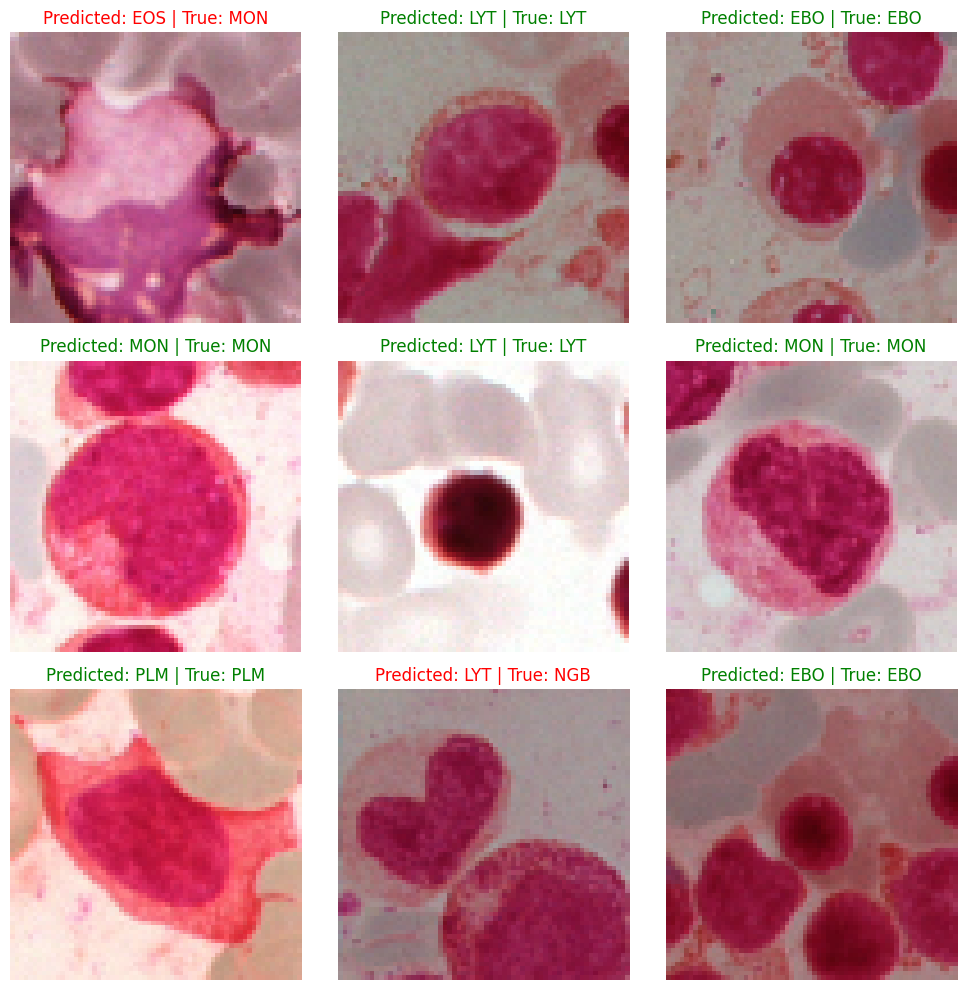

In [24]:
# Visualize the predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i])
    if predicted_labels[i] == true_labels[i]:
        title_color = 'green'  # Correct prediction
    else:
        title_color = 'red'  # Incorrect prediction
    plt.title(f'Predicted: {predicted_labels[i]} | True: {true_labels[i]}', color=title_color)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [25]:
# Define specific classes for prediction
specific_classes = ['Leukemia', 'Lymphoma', 'Thalassemia', 'Sickle Cell Anemia']

# Get indices corresponding to specific classes with case-insensitive partial match
specific_class_indices = [
    next((i for i, label in enumerate(label_encoder.classes_) if cls.lower() in label.lower()), None)
    for cls in specific_classes
]

# Initialize lists for storing specific class predictions and true labels
specific_class_predictions = []
specific_class_true_labels = []

# Perform predictions on test images for specific classes
for index in specific_class_indices:
    if index is not None:
        specific_class_predictions.append(predictions[:, index])
        specific_class_true_labels.append(y_test[:, index] if index < y_test.shape[1] else np.zeros(y_test.shape[0]))

# Convert lists to NumPy arrays
specific_class_predictions = np.array(specific_class_predictions).T
specific_class_true_labels = np.array(specific_class_true_labels).T

# Display some debugging information
print("specific_class_indices:", specific_class_indices)
print("specific_class_predictions shape:", specific_class_predictions.shape)
print("specific_class_true_labels shape:", specific_class_true_labels.shape)


specific_class_indices: [None, None, None, None]
specific_class_predictions shape: (0,)
specific_class_true_labels shape: (0,)


In [26]:
# Display the predictions in a table
import pandas as pd

# Create a DataFrame
prediction_table_data = {'Image': list(range(1, len(X_test) + 1))}

if specific_class_predictions.shape[0] > 0:
    specific_class_predictions = np.reshape(specific_class_predictions, (len(X_test), -1))

    for i, cls in enumerate(specific_classes):
        prediction_table_data[f'{cls} Prediction'] = specific_class_predictions[:, i]
else:
    # Handle the case when specific_class_predictions is empty
    for cls in specific_classes:
        prediction_table_data[f'{cls} Prediction'] = np.zeros(len(X_test))

# Display the table
prediction_table = pd.DataFrame(prediction_table_data)
prediction_table


Image  Leukemia Prediction  Lymphoma Prediction  Thalassemia Prediction  \
0         1                  0.0                  0.0                     0.0   
1         2                  0.0                  0.0                     0.0   
2         3                  0.0                  0.0                     0.0   
3         4                  0.0                  0.0                     0.0   
4         5                  0.0                  0.0                     0.0   
...     ...                  ...                  ...                     ...   
8111   8112                  0.0                  0.0                     0.0   
8112   8113                  0.0                  0.0                     0.0   
8113   8114                  0.0                  0.0                     0.0   
8114   8115                  0.0                  0.0                     0.0   
8115   8116                  0.0                  0.0                     0.0   

      Sickle Cell Anemia Prediction  
0                               0.0  
1                               0.0  
2                               0.0  
3                               0.0  
4                               0.0  
...                             ...  
8111                            0.0  
8112                            0.0  
8113                            0.0  
8114                            0.0  
8115                            0.0  

[8116 rows x 5 columns]

In [27]:
# Create a new cell for visualizing outliers
!pip install seaborn
import seaborn as sns

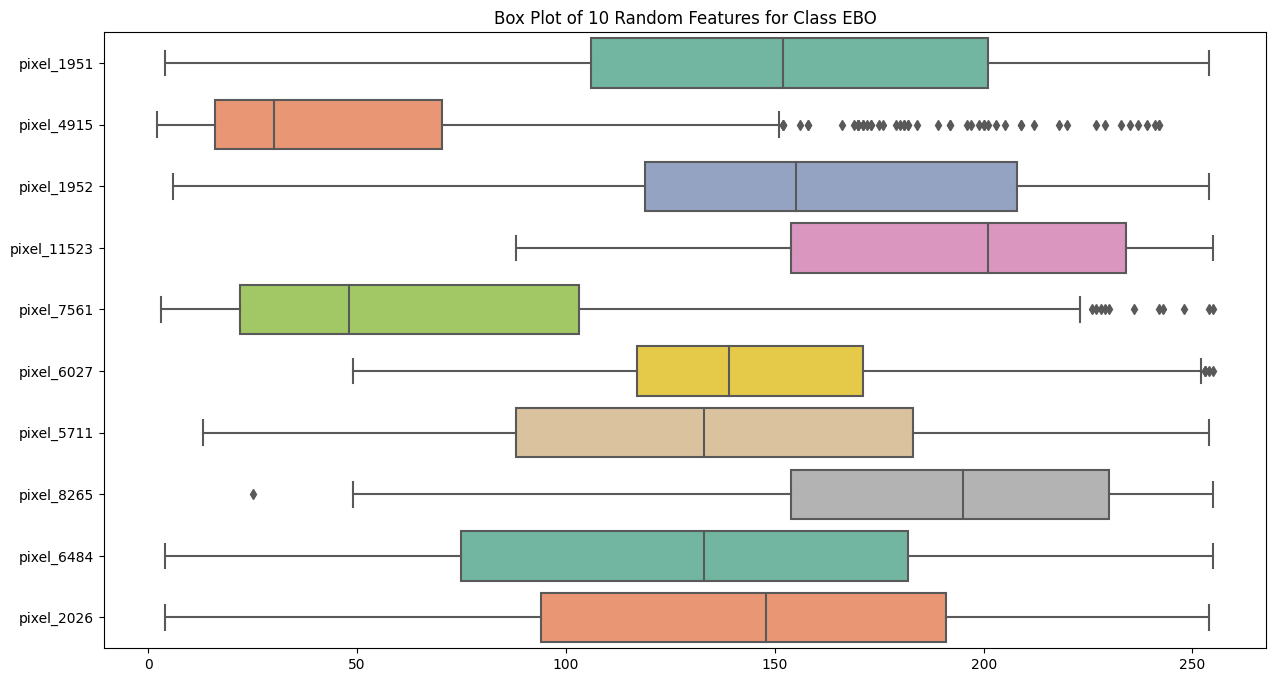

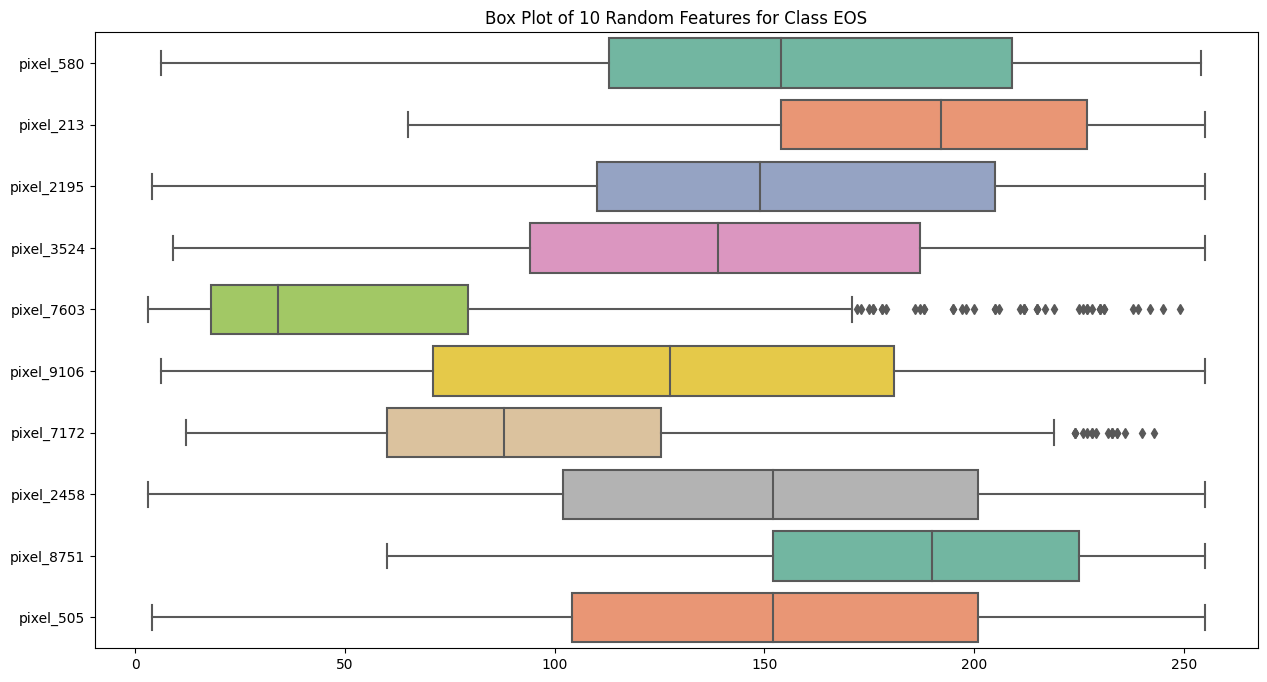

IndexError: ignored

In [35]:
# Create a new cell for visualizing outliers with optimization

import seaborn as sns

# Function to create box plots for each class
def visualize_outliers(images, class_labels, sample_size=1000, num_features=10):
    # Get unique class labels
    unique_classes = np.unique(class_labels)

    # Plot box plots for each class separately
    for cls in unique_classes:
        # Select indices for the current class
        class_indices = np.where(class_labels == cls)[0]

        # Check if the sample size is larger than the available indices
        if sample_size > len(class_indices):
            sample_size = len(class_indices)

        # Sample a subset of indices to reduce memory consumption
        sample_indices = np.random.choice(class_indices, size=sample_size, replace=False)

        # Use modulo to wrap around if the sample size exceeds the number of available indices
        class_indices = np.take(class_indices, sample_indices, mode='wrap')

        # Select images and labels for the current class
        class_images = images[class_indices]
        class_labels_subset = class_labels[class_indices]

        # Reshape images to a 1D array for box plot
        class_images_1d = class_images.reshape(class_images.shape[0], -1)

        # Take a random subset of features to reduce memory consumption
        selected_features = np.random.choice(class_images_1d.shape[1], size=num_features, replace=False)
        class_images_1d_subset = class_images_1d[:, selected_features]

        # Combine image data with class labels
        data = np.column_stack((class_images_1d_subset, class_labels_subset))

        # Create a DataFrame
        feature_columns = [f'pixel_{i}' for i in selected_features]
        df = pd.DataFrame(data, columns=feature_columns + ['Class'])

        # Convert 'pixel_*' columns to numeric (as they may be of type object)
        df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

        # Plot box plot for the current class
        plt.figure(figsize=(15, 8))
        sns.boxplot(data=df, orient='h', palette='Set2')
        plt.title(f'Box Plot of {num_features} Random Features for Class {cls}')
        plt.show()

# Visualize outliers for each class (using sampling and limited features)
visualize_outliers(X_train, class_labels, sample_size=1000, num_features=10)


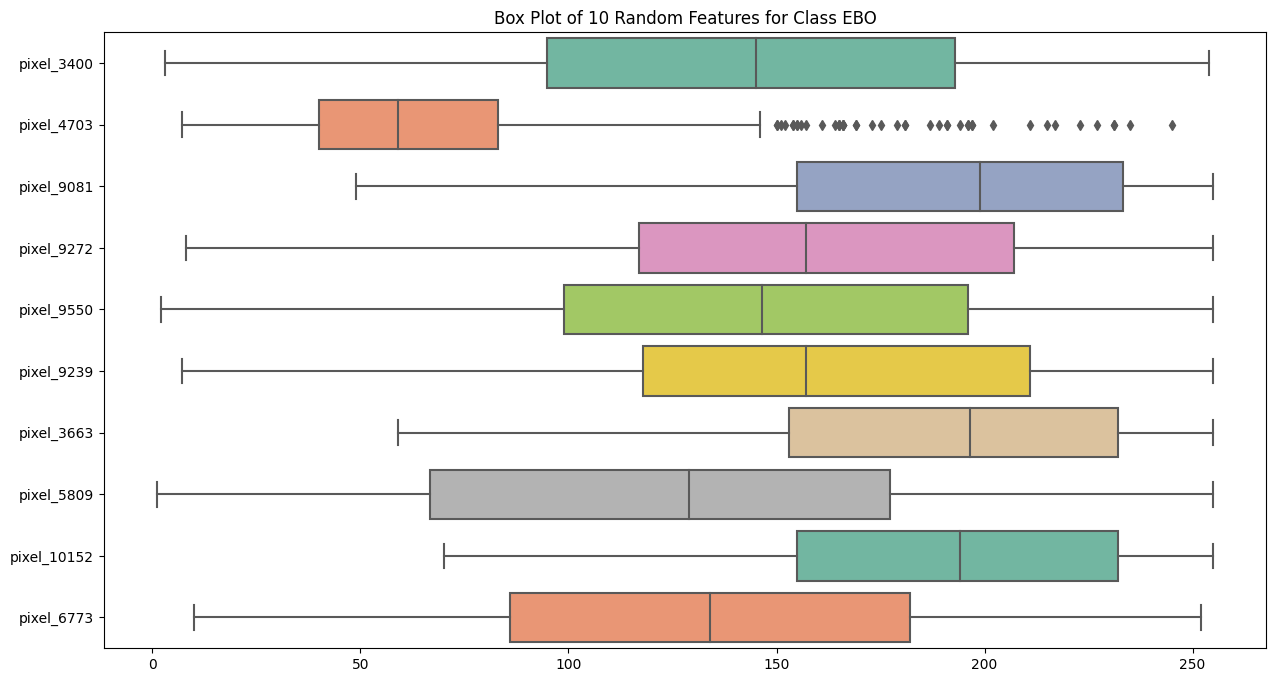

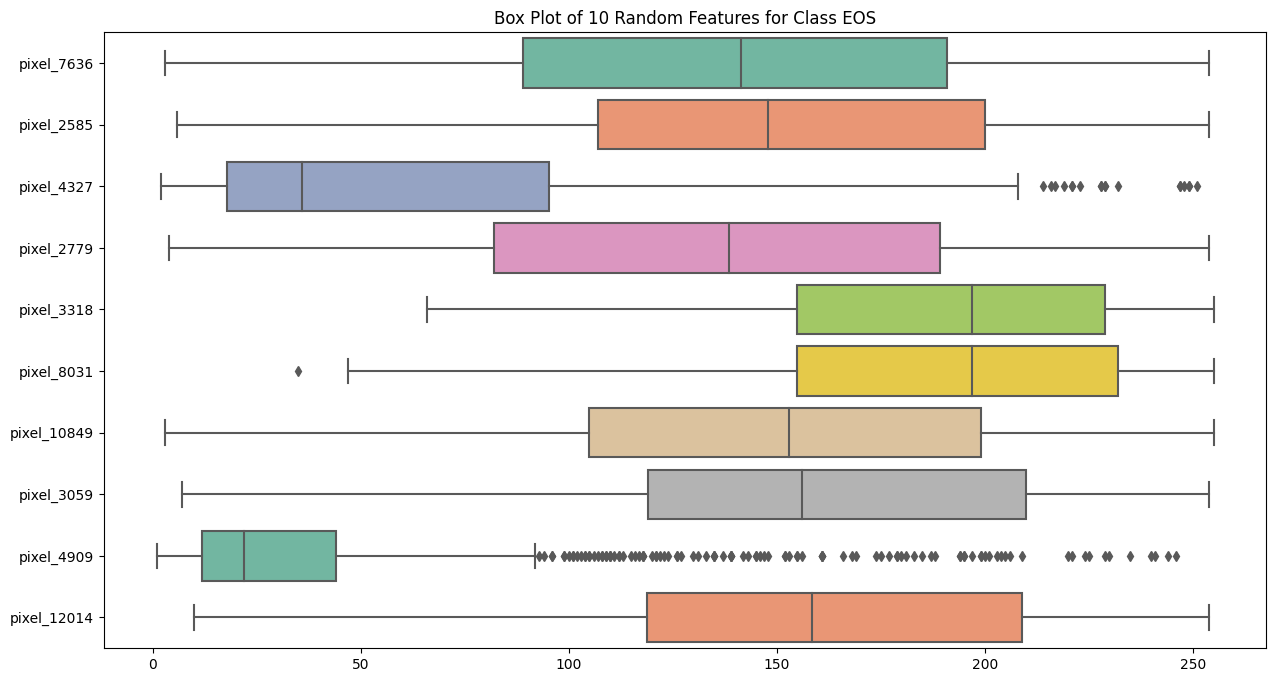

IndexError: ignored

In [34]:
visualize_outliers(X_train, class_labels, sample_size=1000, num_features=10)